__STATISTICAL APPLICATION ON AIRBNB DATA__

__CAPSTONE PROJECT #1 STATISTICAL APPLICATION__


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import math


In [2]:
airbnb = pd.read_csv('data/dfmergefinal.csv')

In [3]:
airbnb.shape

(3340486, 30)

In [4]:
airbnb.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN


__#1: Is there a significant difference between age of users in terms of their genders who booked in the US.
Ho: There is no significant difference between ages of females and males. 
H1: There is significant diffence between the ages of females and males.__

In [5]:
#Create a subset to work based on my interest
airbnb_test = airbnb[(airbnb['age'].notnull()) & (airbnb['country_destination'] != 'NDF') &
                (airbnb['country_destination'] == 'US') &(airbnb['country_destination'] != 'other') & (airbnb['gender'] != 'OTHER') &
                (airbnb['gender'].notnull() & airbnb['secs_elapsed'].notnull())]
airbnb_test= airbnb_test[['user_id', 'gender', 'country_destination', 'age', 'secs_elapsed']]
airbnb_test.head()

,user_id,gender,country_destination,age,secs_elapsed
315,xwxei6hdk4,FEMALE,US,32.0,1355.0
316,xwxei6hdk4,FEMALE,US,32.0,1246.0
318,xwxei6hdk4,FEMALE,US,32.0,386.0
319,xwxei6hdk4,FEMALE,US,32.0,424.0
320,xwxei6hdk4,FEMALE,US,32.0,0.0


In [9]:
#descriptive statistics for gender
airbnb_test['gender'].describe()

count     678076
unique         2
top       FEMALE
freq      378691
Name: gender, dtype: object

In [10]:
#descriptive statistics for country destination
airbnb_test['country_destination'].describe()

count     678076
unique         1
top           US
freq      678076
Name: country_destination, dtype: object

__Users booked in the US are mostly female.I will now find out if there is significant difference between males and females in terms of their ages. The null hypothesis is "there is no difference between males and females who select their country destination as US in terms of their ages". The alternative hypothesis is "there is a difference between two groups."__

In [11]:
#calculate the number of male users
male = airbnb_test[airbnb_test.gender == 'MALE']
male.shape

(299385, 5)

In [12]:
#calculate the number of female users

female = airbnb_test[airbnb_test.gender == 'FEMALE']
female.shape

(378691, 5)

In [13]:
#calculate the mean and standard deviations of males
male_age_mean = male.age.mean()
print(male_age_mean)

male_age_std = male.age.std()
print(male_age_std)

34.98603136429681
11.854855086709195


In [14]:
#calculate the mean and standard deviations of females
female_age_mean = female.age.mean()
print(female_age_mean)
female_age_std = female.age.std()
print(female_age_std)

34.76702641467582
13.124190304005962


In [15]:
# Means for females and males seem to be close. I want to calculate the difference in means.

mean_difference= male_age_mean - female_age_mean
print("The difference between the means of males and females is ", mean_difference)

The difference between the means of males and females is  0.21900494962098804


In [16]:
# Now I want to calculate the standard error

SE=((male_age_std**2)/372311 + (female_age_std**2)/476439)**0.5
print("Standard error:", SE)

Standard error: 0.027184520259685614


In [18]:
#manual calculation of t and p values
male_age = airbnb_test.age[airbnb_test.gender == 'MALE']  #assign male age
female_age = airbnb_test.age[airbnb_test.gender == 'FEMALE'] #assign female age
mean_male = np.mean(male_age) #mean of male age
print('Mean Male:', mean_male)
mean_female = np.mean(female_age) #mean of female age
print('Mean Female:', mean_female)
std_dev_male = np.std(male_age) #standard deviation of male age
print('Standard Deviation Male:', std_dev_male)
std_dev_female = np.std(female_age) #standard deviation of female age
print('Standard Deviation Female:', std_dev_female)

Mean Male: 34.98603136429681
Mean Female: 34.76702641467582
Standard Deviation Male: 11.85483528801356
Standard Deviation Female: 13.124172975631419


In [19]:
#calculate t value manually
n0 = len(male_age)
n1= len(female_age)
std0 = male_age.std()
std1= female_age.std()
mean0 = mean_male
mean1= mean_female
sp = np.sqrt( ((n0-1)*(std0)**2 + (n1-1)*(std1)**2)/ (n0+n1-2) )
t_ = (mean1 - mean0)/(sp * np.sqrt(1/n0 + 1/n1)) 
print(t_)

-7.118804078367921


In [20]:
# Use 0.05 Significance level in two sample t-test
t_val=((male_age_mean - female_age_mean)-0)/SE
print(t_val)

8.056237429570178


In [21]:
#calculate p value manually 
p_value = (1 - t(n0 + n1 - 1).cdf(t_)) * 2
p_value

1.9999999999989102

In [22]:
#calculate t and p values using scipy
ttest_ind(male_age, female_age)

Ttest_indResult(statistic=7.118804078366678, pvalue=1.0897469575308629e-12)

__Because the p-value is less then 0.05, we reject null hypothesis and obtain alternative hypothesis which shows that there is significant difference between the means of males and females ages.__

# _______________________________________________________________________

__#2: Is there a significant difference between elapsed time in terms of users' genders who booked in the US.__

__Ho: There is no significant difference between the means of females and males.__
__H1: There is significant diffence between the means of females and males.__

Text(0.5, 0, 'Seconds Elapsed')

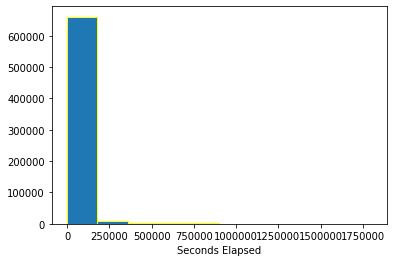

In [23]:
#plot the elapsed time
plt.hist(airbnb_test['secs_elapsed'], edgecolor = 'yellow', bins=10)
plt.xlabel('Seconds Elapsed')

In [24]:
elapsed_time = airbnb_test['secs_elapsed']

In [25]:
elapsed_time.shape

(678076,)

In [26]:
#calculate the standard deviation and mean of second elapsed
std_elapsed_time=np.std(elapsed_time)
mean_elapsed_time=np.mean(elapsed_time)
print("Standart Deviation: ", std_elapsed_time)
print("Mean: ", mean_elapsed_time)

Standart Deviation:  98548.91733977081
Mean:  22653.53765359635


__INTERPRETATIONS:__ Standard deviation is too high compare to mean. The histogram shows that the data is not normally distributed, but right skewed.

In [27]:
median_elapsed_time= np.median(elapsed_time)
print("Median: ", median_elapsed_time)

Median:  1258.0


In [28]:
airbnb_test.gender.value_counts()

FEMALE    378691
MALE      299385
Name: gender, dtype: int64

In [30]:
#calculate the percentages
airbnb_test.gender.value_counts(normalize=True)

FEMALE    0.558479
MALE      0.441521
Name: gender, dtype: float64

In [31]:
n = len(airbnb_test['secs_elapsed'])
lower = mean_elapsed_time + norm.ppf(0.05)*std_elapsed_time/np.sqrt(n)
print(lower)

22456.68561000778


__INTERPRETATION:__ This indicates with a 95% confidence interval that the mean is above 22456.

In [32]:
#I want to compare male and female in terms the elapsed time. 
#in order to do that I first need to calculate their means. I will also calculare std. deviations.
#our null hyphothesis is that these two groups have same variance

male = airbnb_test.secs_elapsed[airbnb_test.gender == 'MALE']  
female = airbnb_test.secs_elapsed[airbnb_test.gender == 'FEMALE']
mean_male = np.mean(male)
print('Mean Male:', mean_male)
mean_female = np.mean(female)
print('Mean Female:', mean_female)
std_dev_male = np.std(male)
print('Standard Deviation Male:', std_dev_male)
std_dev_female = np.std(female)
print('Standard Deviation Female:', std_dev_female)

Mean Male: 23262.14048132004
Mean Female: 22172.38928308304
Standard Deviation Male: 102037.81496088109
Standard Deviation Female: 95697.9459837973


In [33]:
n0 = len(male)
n1= len(female)
std0 = male.std()
std1= female.std()
mean0 = mean_male
mean1= mean_female
sp = np.sqrt(((n0-1)*(std0)**2 + (n1-1)*(std1)**2)/(n0+n1-2))
t_ = (mean1 - mean0)/(sp * np.sqrt(1/n0 + 1/n1)) 
print(t_)

-4.521679006836198


In [34]:
p_value = (1 - t(n0 + n1 - 1).cdf(t_)) * 2
p_value

1.9999938638589012

In [35]:
ttest_ind(male, female)

Ttest_indResult(statistic=4.521679006836163, pvalue=6.136141100266454e-06)

__INTERPRETATION:__ Those are the results when we assume that there is no difference between variances of two groups. I want to look for the values when the variances are not assumed to be same this time.

In [36]:
ttest_ind(male, female, equal_var=False)

Ttest_indResult(statistic=4.487927633810977, pvalue=7.1932208754725195e-06)

__INTERPRETATION:__ Because the pvalue is less than 0.05, we reject the null hypothesis which was "there was no difference in elapsed times between females and males." Instead, we will need to obtain the alternative hyphotesis which obviously shows that there is a significant difference between these two groups who booked in the US.  

__BOOTSTRAP METHOD and CONFIDENCE INTERVAL__

In [37]:
from numpy.random import seed

In [45]:
np.random.seed(47)
N_rep = 1000

# set up an empty array
bs_replicates = np.empty(N_rep)

# getting 10000 bootstrap replicates (10000) 
# replicates indicate the statistic value

for i in range(N_rep):
    bs_sample = np.random.choice(airbnb_test.secs_elapsed, size=len(airbnb_test.secs_elapsed))
    bs_replicates[i] = bs_sample.mean()


In [46]:
# estimating the same 95% confidence interval lower limit 
# since it's the lower limit, set the area under the curve as 5%
lower_limit = np.percentile(bs_replicates, [5])[0]

print("The lower limit of the 95% confidence interval is: {}".format(lower_limit))

The lower limit of the 95% confidence interval is: 22456.202649555507


__INTERPRETATION:__ When I performed 10000 replicates immediately after setting the random seed to 47, I got the the value 22456.2 here, which compares almost perfectly same with the value 22456.6 obtained using the t-distribution confidence interval previously.

In [47]:
# making a function since we will use this logic often
# (Reference: Datacamp / Statistical Thinking in Python (Part 2) / Generating many Bootstrap Replicates)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates. 
    Func refers to the type of statistic we want (np.mean / np.median etc.)"""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)  # store the statistic from each bs_sample into the new array

    return bs_replicates

In [48]:
# Male and female groups in arrays
male_bts = np.array(airbnb_test[airbnb_test['gender']== "MALE"].secs_elapsed)
female_bts = np.array(airbnb_test[airbnb_test['gender']== "FEMALE"].secs_elapsed)

# Difference of the standard deviation of the original sample (observed)
obs_difference_std = np.std(male_bts) - np.std(female_bts)
obs_difference_std

6339.8689770809

In [49]:
# difference in bootstrap relicates (for N=10000)
bs_diff_std = draw_bs_reps(male_bts, np.std, size=10000) - draw_bs_reps(female_bts, np.std, size=10000)
    
# getting the 95% confidence interval
ci_95 = np.percentile(bs_diff_std,[2.5, 97.5])
ci_95

print("The 95% confidence interval of the difference in standard deviation\
      between two groups is: [{} , {}]".format(ci_95[0],ci_95[1]))

The 95% confidence interval of the difference in standard deviation      between two groups is: [3723.4564025594013 , 8950.454220856525]


__INTERPRETATION:__ My Null and Alternative Hypothesis were as follows:

$H_0$ : there is no difference in standard deviations between males and females
i.e. $\mu_d$ = 0

$H_a$ : there is a difference in standard deviations between males and females
i.e. $\mu_d$ $\neq$ 0


My Bootstrap replicates with a 95% confidence interval indicate that the difference in standard deviations between the two groups have a 95% chance of lying within [3723.4564025594013 , 950.454220856525], which does not contain zero.

Thus I reject the null hypothesis. There is a significant difference in standard deviation (and thus variance) between males and females in terms of elapsed time.

In [50]:
#Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$)
#to calculate the p-value of the observed difference between females and males. 
#I will state my null and alternative hypotheses and 
#whether I will retain or reject the null hypothesis for the given significance level at the end.

__For $\alpha$ = 0.05,
$H_0$ : there is no difference in charges between males and females
i.e. $\mu_d$ = 0
$H_a$ : there is a difference in charges between males and females
i.e. $\mu_d$ $\neq$ 0__

In [51]:
# # Shifting the Dataset so that the two groups have equal means

# First calculating the combined mean
combined_mean = np.mean(np.concatenate((male_bts, female_bts)))

# Generate the shifted dataset 
male_shifted = male_bts - np.mean(male_bts) + combined_mean
female_shifted =  female_bts - np.mean(female_bts) + combined_mean

In [52]:
# Draw the bootstrap replicates from the shifted dataset
bs_replicates_male = draw_bs_reps(male_shifted, np.mean, size=1000)
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, size=1000)

In [53]:
# Get the differences for the bootstrap simulated sample
bs_differences = bs_replicates_male - bs_replicates_female


# Get the observed difference from the actual dataset
obs_diff = np.mean(male_bts) - np.mean(female_bts)
obs_diff

1089.7511982369979

In [54]:
# Calculate the p-value by comparing the bootstrap replicates against the observed difference of the means
# The fraction of values WITHIN bootstrap replicates array that meet a certain criteria against the obs_diff

p = np.sum(bs_differences >= obs_diff)/ len(bs_differences)
print('p-value =', p)

p-value = 0.0


__INTERPRETATION:__ Under the null hypothesis, we get a p-value of 0. Thus it is sufficiently unlikely that the null hypothesis is true and thus we reject the null. There is a difference in elapsed time between females and males..